In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from PIL import Image

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [25]:
DATA_FOLDER = "20211208_Membrane_RT"
DATA_FOLDERPATH, FIGURE_FOLDERPATH = sio.get_data_and_figure_paths(DATA_FOLDER)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
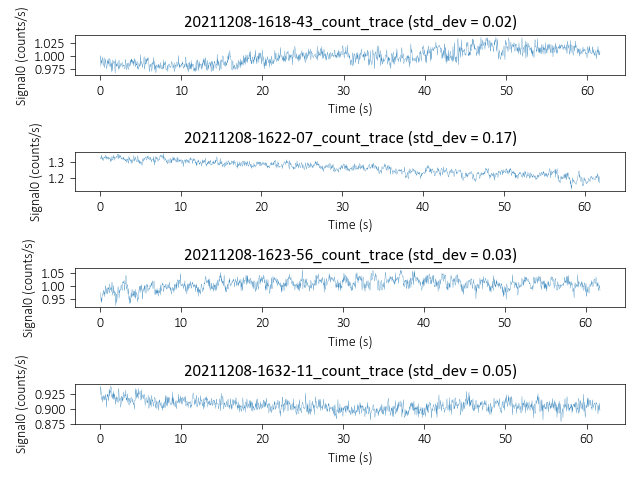

In [39]:
%matplotlib widget

counter_filepaths, counter_filenames = sio.get_measurement_file_list(DATA_FOLDERPATH, measurement="Counter")

counter_filepaths, counter_filenames = counter_filepaths[-4:], counter_filenames[-4:]
fig, ax = plt.subplots(nrows=len(counter_filepaths), sharey=False, sharex=False)

for idx, filepath in enumerate(counter_filepaths):
    df = sio.read_into_df(filepath)
    norm_counts = df["Signal0 (counts/s)"] / df["Signal0 (counts/s)"].median()
    ax[idx].plot(df["Time (s)"][:1500], norm_counts[:1500], linewidth=0.2)
    ax[idx].set_xlabel(df.columns[0])
    ax[idx].set_ylabel(df.columns[1])
    ax[idx].set_title(f"{counter_filenames[idx]} (std_dev = {np.std(norm_counts):.2f})")

fig.tight_layout()